In [12]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import xgboost as xgb

In [13]:
# Load dataset
#df = pd.read_csv('robust_fake_profile_data.csv')
df = pd.read_csv('realistic_fake_profile_data.csv')

In [14]:

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

In [18]:
# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 6,
    'colsample_bytree': 0.8,
    'seed': 42
}

In [19]:
# Define watchlist for early stopping
eval_set = [(dtrain, 'train'), (dtest, 'eval')]

In [20]:
# Train model with early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=eval_set,
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	train-logloss:0.64670	eval-logloss:0.64825
[10]	train-logloss:0.38651	eval-logloss:0.40216
[20]	train-logloss:0.24651	eval-logloss:0.26858
[30]	train-logloss:0.16984	eval-logloss:0.19621
[40]	train-logloss:0.12046	eval-logloss:0.14825
[50]	train-logloss:0.08940	eval-logloss:0.11879
[60]	train-logloss:0.06779	eval-logloss:0.09733
[70]	train-logloss:0.05415	eval-logloss:0.08475
[80]	train-logloss:0.04160	eval-logloss:0.07082
[90]	train-logloss:0.03205	eval-logloss:0.05953
[100]	train-logloss:0.02682	eval-logloss:0.05327
[110]	train-logloss:0.02260	eval-logloss:0.04740
[120]	train-logloss:0.01927	eval-logloss:0.04358
[130]	train-logloss:0.01713	eval-logloss:0.04146
[140]	train-logloss:0.01529	eval-logloss:0.03922
[150]	train-logloss:0.01359	eval-logloss:0.03726
[160]	train-logloss:0.01243	eval-logloss:0.03623
[170]	train-logloss:0.01140	eval-logloss:0.03539
[180]	train-logloss:0.01062	eval-logloss:0.03519
[190]	train-logloss:0.01002	eval-logloss:0.03436
[200]	train-logloss:0.00947	eva

In [21]:
# Predict on test set
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

In [22]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       171
           1       0.94      1.00      0.97        29

    accuracy                           0.99       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.99      0.99      0.99       200

ROC AUC Score: 0.9997983464408148


In [24]:
type(model)


xgboost.core.Booster

In [25]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [26]:

# Prepare DMatrix for test set
dtest = xgb.DMatrix(X_test_scaled)

In [27]:

# Get probability predictions
y_proba = model.predict(dtest)

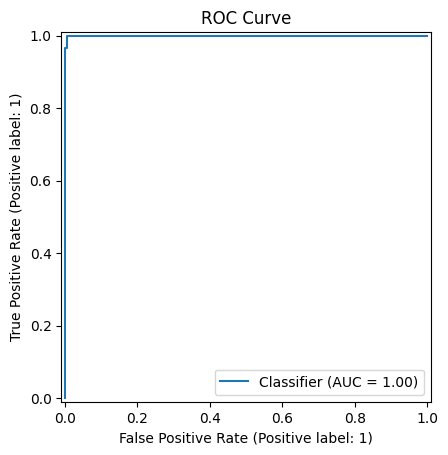

In [28]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title('ROC Curve')
plt.show()

In [29]:
# Convert probabilities to binary predictions
y_pred = (y_proba >= 0.5).astype(int)

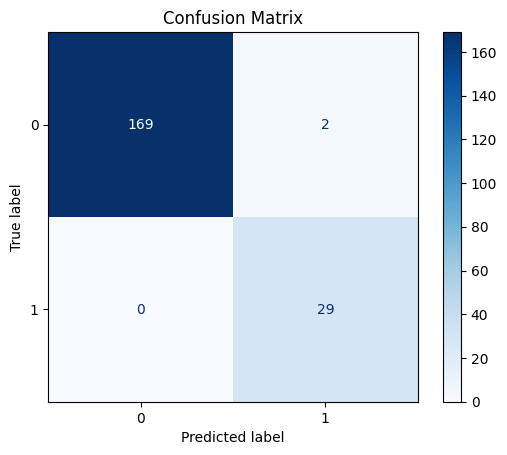

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Save model
model.save_model("model.json")


In [34]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']